In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

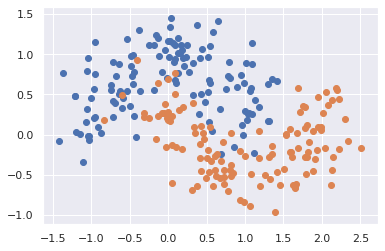

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=250, noise=0.25, random_state=42)

plt.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1])
plt.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [0]:
from matplotlib.colors import ListedColormap

def draw_clf(model, X, y, meshgrid_steps=100, meshgrid_padding=0.05, fig_size=(6, 6), c_lightering=0.3, 
             feature_names=None, target_names=None, title=None, raw_data=False):

    x0_min, x0_max = np.min(X[:, 0]), np.max(X[:, 0])
    x1_min, x1_max = np.min(X[:, 1]), np.max(X[:, 1])

    x0_delta = (x0_max - x0_min) * meshgrid_padding
    x1_delta = (x1_max - x1_min) * meshgrid_padding

    x0_values = np.linspace(x0_min - x0_delta, x0_max + x0_delta, meshgrid_steps);
    x1_values = np.linspace(x1_min - x1_delta, x1_max + x1_delta, meshgrid_steps);

    xx0, xx1 = np.meshgrid(x0_values, x1_values)
    z = model.predict(np.c_[xx0.ravel(), xx1.ravel()])
    z = z.reshape(xx0.shape)

    current_palette = np.array(sns.color_palette()[:len(np.unique(y))])
    lighter_pallete = ListedColormap(current_palette + (1 - current_palette) * c_lightering)

    if raw_data:
        return xx0, xx1, z, lighter_pallete

    fig, ax = plt.subplots(1, 1, figsize=fig_size)
    
    ax.pcolormesh(xx0, xx1, z, cmap=lighter_pallete)

    labels = [f'class {x} - {target_names[x]}' if isinstance(target_names, (np.ndarray, list)) else f'class {x}' 
              for x in range(len(np.unique(y)))]

    for idx, lbl in enumerate(labels):
        ax.scatter(X[np.where(y==idx), 0], X[np.where(y==idx), 1], label=lbl, ec='w')
        ax.legend()

    ax.set_xlabel(feature_names[0] if feature_names else 'x0')
    ax.set_ylabel(feature_names[1] if feature_names else 'x1')
    
    if title:
        ax.set_title(title)

    return ax

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier


tree_clf = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=1000, max_samples=100, bootstrap=True, n_jobs=-1)
pasting_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=50, max_samples=100, bootstrap=False, n_jobs=-1)

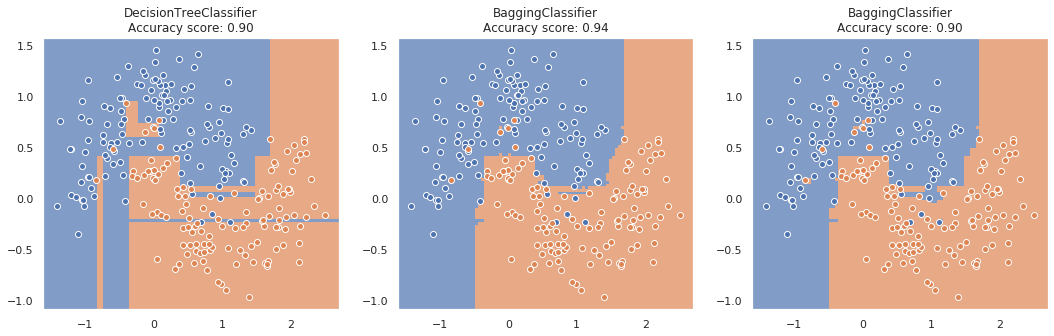

In [34]:
from sklearn.metrics import accuracy_score


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

for clf, ax in zip([tree_clf, bagging_clf, pasting_clf], axes):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = accuracy_score(y_test, y_pred)

    xx, yy, z, pallete = draw_clf(clf, X, y, raw_data=True)
    ax.pcolormesh(xx, yy, z, cmap=pallete)
    ax.scatter(X[np.where(y==0), 0], X[np.where(y==0), 1], ec='w')
    ax.scatter(X[np.where(y==1), 0], X[np.where(y==1), 1], ec='w')
    ax.set_title(f'{clf.__class__.__name__}\nAccuracy score: {score:.2f}')


## Feature bagging

In [53]:
from sklearn.datasets import load_breast_cancer


breast_cancer_db = load_breast_cancer()
X = breast_cancer_db.data
y = breast_cancer_db.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

hyperparameters = [dict(max_features=10, bootstrap_features=True),
                   dict(max_features=20, bootstrap_features=True),
                   dict(max_features=30, bootstrap_features=True)]

for hyperparameter in hyperparameters:

    bagging_param = hyperparameter.copy()
    bagging_param.update(dict(max_samples=100, bootstrap=True))

    pasting_param = hyperparameter.copy()
    pasting_param.update(dict(max_samples=100, bootstrap=False))

    bagging_clf = BaggingClassifier(**bagging_param)
    pasting_clf = BaggingClassifier(**pasting_param)
    
    bagging_clf.fit(X_train, y_train)
    pasting_clf.fit(X_train, y_train)

    y_pred_bagging = bagging_clf.predict(X_test)
    y_pred_pasting = pasting_clf.predict(X_test)

    bagging_score = accuracy_score(y_test, y_pred_bagging)
    pasting_score = accuracy_score(y_test, y_pred_pasting)

    print(f'Hyperparameters {hyperparameter}')
    print(f'Bagging clf accuracy score: {bagging_score:.2f}')
    print(f'Pasting clf accuracy score: {pasting_score:.2f}')
    print()



Hyperparameters {'max_features': 10, 'bootstrap_features': True}
Bagging clf accuracy score: 0.91
Pasting clf accuracy score: 0.95

Hyperparameters {'max_features': 20, 'bootstrap_features': True}
Bagging clf accuracy score: 0.95
Pasting clf accuracy score: 0.96

Hyperparameters {'max_features': 30, 'bootstrap_features': True}
Bagging clf accuracy score: 0.94
Pasting clf accuracy score: 0.96

